# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes (whole world)
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&units=metric&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | papao
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | changji
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | aleksandrovskoye
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | bakanas
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | buzuluk
Processing Record 15 of Set 1 | mandal
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | shelbyville
Processing Record 18 of Set 1 | garissa
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | edinburgh of the seven seas

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-0.91,78,93,3.04,GS,1745433959
1,papao,-17.7500,-149.5500,27.82,76,57,9.33,PF,1745433960
2,bredasdorp,-34.5322,20.0403,15.23,86,0,2.89,ZA,1745433961
3,changji,44.0167,87.3167,16.44,36,0,3.00,CN,1745433962
4,mahibadhoo,3.7833,72.9667,29.36,71,97,4.68,MV,1745433964


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.91,78,93,3.04,GS,1745433959
1,papao,-17.7500,-149.5500,27.82,76,57,9.33,PF,1745433960
2,bredasdorp,-34.5322,20.0403,15.23,86,0,2.89,ZA,1745433961
3,changji,44.0167,87.3167,16.44,36,0,3.00,CN,1745433962
4,mahibadhoo,3.7833,72.9667,29.36,71,97,4.68,MV,1745433964


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

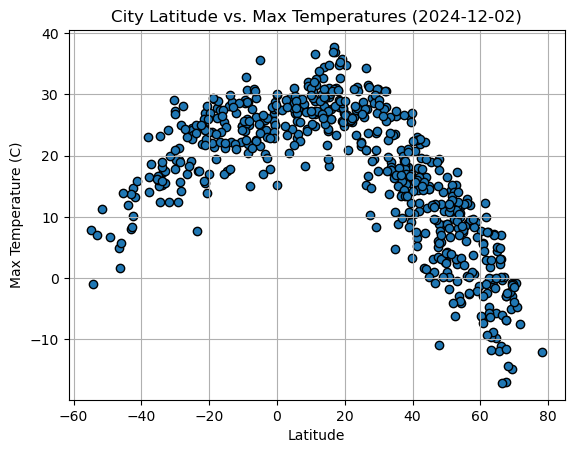

In [8]:
# Build scatter plot for latitude vs. temperature

latitude_x = city_data_df['Lat']
temperature_y = city_data_df['Max Temp']

plt.scatter(latitude_x, temperature_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Max Temperatures (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

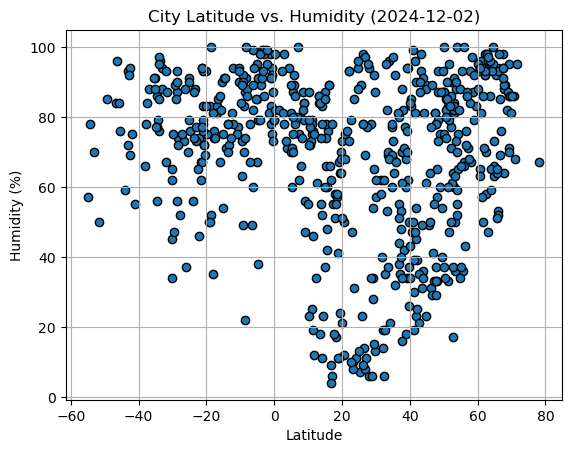

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude_x = city_data_df['Lat']
humidity_y = city_data_df['Humidity']

plt.scatter(latitude_x, humidity_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Humidity (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

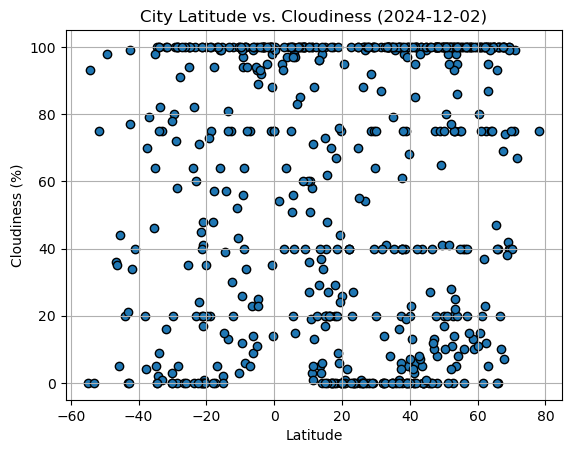

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude_x = city_data_df['Lat']
cloudiness_y = city_data_df['Cloudiness']

plt.scatter(latitude_x, cloudiness_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Cloudiness (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

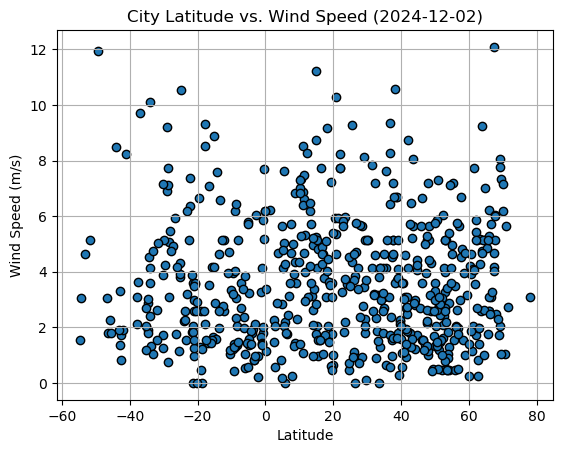

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude_x = city_data_df['Lat']
wind_speed_y = city_data_df['Wind Speed']

plt.scatter(latitude_x, wind_speed_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Wind Speed (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regress(x_axis, y_axis, x, y):

	# Linear Regression Plots Calculation

	slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
	regress_values = slope * x_axis + intercept

	# Chart Plot & Regression Line

	plt.scatter(x_axis, y_axis, edgecolors='black')
	plt.plot(x_axis, regress_values, color='red')

	# Format and display Regression Line Equation

	regress_equation = f"y = {round(slope, 2)}x + {round(intercept,2)}"
	plt.text(x, y, regress_equation, fontsize=15, color='red')
	
	# Chart Formatting

	plt.title(f"Latititude vs. {str(y_axis.name)}")
	plt.xlabel('Latitude')
	plt.ylabel(y_axis.name)
	
	# Print r squared value
	
	print(f"The r^2-value is: {r_value**2}")

	# Show Chart

	plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,changji,44.0167,87.3167,16.44,36,0,3.00,CN,1745433962
4,mahibadhoo,3.7833,72.9667,29.36,71,97,4.68,MV,1745433964
5,ixtapa,20.7000,-105.2000,26.57,50,0,4.63,MX,1745433965
6,ribeira grande,38.5167,-28.7000,18.22,77,40,6.69,PT,1745433966
8,aleksandrovskoye,44.7142,43.0008,14.60,89,100,1.73,RU,1745433968


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-0.91,78,93,3.04,GS,1745433959
1,papao,-17.7500,-149.5500,27.82,76,57,9.33,PF,1745433960
2,bredasdorp,-34.5322,20.0403,15.23,86,0,2.89,ZA,1745433961
7,lebu,-37.6167,-73.6500,16.47,84,70,3.62,CL,1745433967
9,puerto natales,-51.7236,-72.4875,11.25,50,75,5.14,CL,1745433969


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7487690020682379


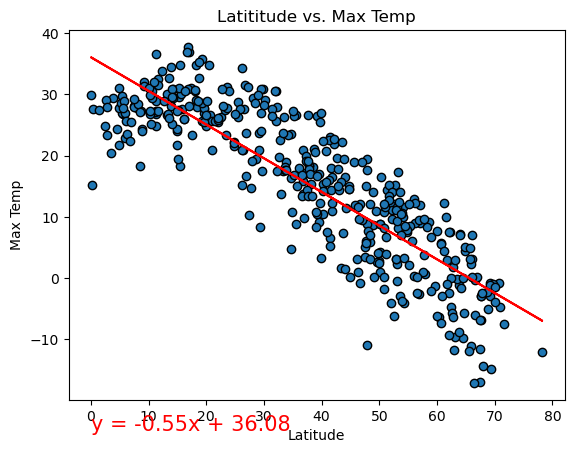

In [15]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 0, -25)


The r^2-value is: 0.508212683683481


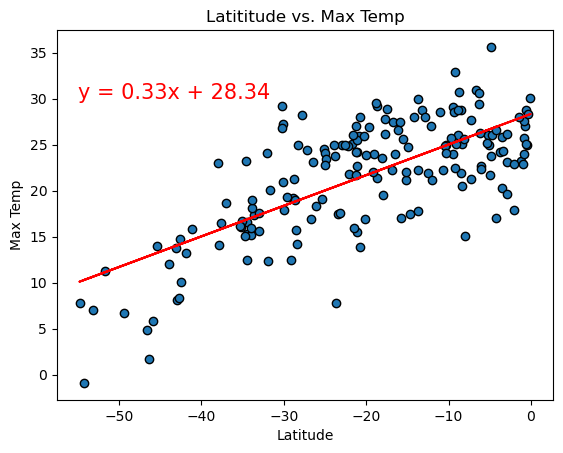

In [16]:
# Linear regression on Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 30)


Analysis of the Linear Relationship Between Latitude and Maximum Temperature:

A linear regression analysis was conducted to explore the relationship between geographic latitude and a city's maximum temperature in both the Northern and Southern Hemispheres.

The scatter plots, accompanied by their respective regression lines, reveal a discernible trend: maximum temperatures tend to increase as one moves closer to the equator (i.e., lower latitudes) and decrease with increasing distance from it.

This inverse relationship between latitude and temperature is more pronounced in the Northern Hemisphere, where the coefficient of determination (R²) is 0.73. This suggests a strong correlation, indicating that approximately 73% of the variability in maximum temperature can be explained by latitude.

In contrast, the Southern Hemisphere displays a weaker, yet still moderate correlation, with an R² value of 0.50. This implies that about 50% of the variation in temperature is accounted for by changes in latitude.

Although the overall trends align with climatological expectations, some outliers and deviations from the trend line indicate that additional environmental and geographical factors may also influence local temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.03733227495971351


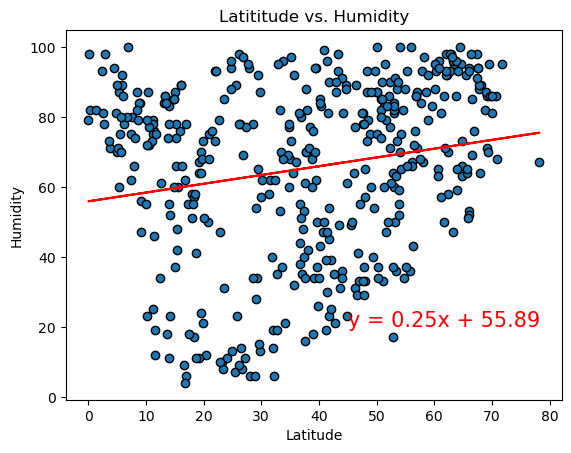

In [17]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 20)


The r^2-value is: 0.027338732296549036


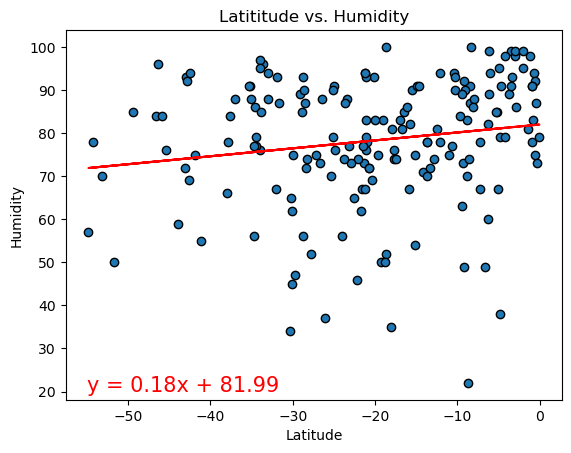

In [18]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 20)


Analysis of the Linear Relationship Between Latitude and Humidity Levels:

A linear regression analysis was performed to examine the potential relationship between geographic latitude and relative humidity levels across cities in both the Northern and Southern Hemispheres.

While there may be a perceived correlation in the scatter plots—particularly in the Northern Hemisphere—the current R² values do not support a statistically meaningful relationship.

The Northern Hemisphere data yields an R² value of 0.17, suggesting only a very weak correlation, with latitude explaining just 17% of the variance in humidity levels.

The Southern Hemisphere demonstrates an even weaker relationship, with an R² value of 0.006. This essentially indicates no correlation between latitude and humidity for that dataset.

Given the limited explanatory power of latitude alone, it is recommended that further analysis incorporate additional geographic variables. In particular, grouping or controlling for city altitude may help clarify the relationships and potentially reveal more actionable insights.



### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.014504525716898493


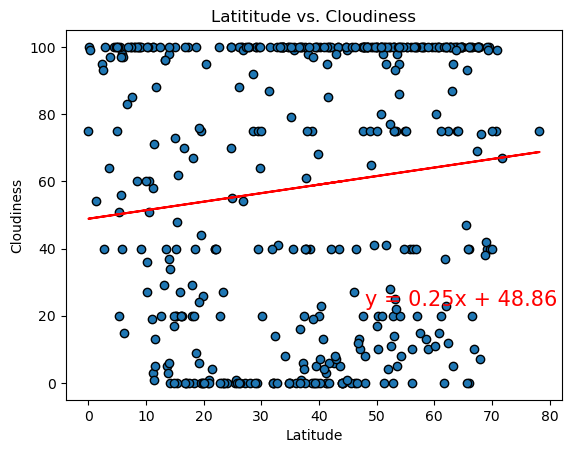

In [19]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 48, 23)


The r^2-value is: 0.07425328433587151


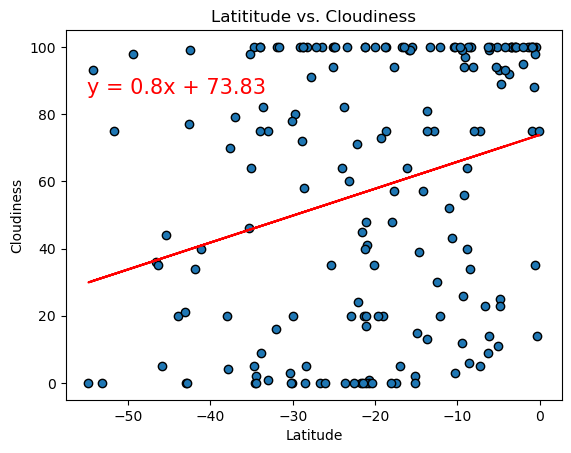

In [20]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -55, 86)


Analysis of the Linear Relationship Between Latitude and Cloudiness:

A review of the scatter plots for latitude versus cloudiness in both the Northern and Southern Hemispheres indicates a minimal to non-existent linear correlation between geographic latitude and observed cloudiness levels.

This observation is supported by the visual distribution of data points, which appear randomly dispersed with no discernible trend aligning with changes in latitude.

One possible limitation in the analysis arises from the nature of the "cloudiness" metric itself. In many datasets, cloudiness is reported in binary or extreme categorical terms—such as fully cloudy or fully clear—which results in data clustering around values like 0% and 100%.

Such polarization reduces the effectiveness of linear regression, as the variable does not exhibit the continuous variability typically required for strong linear modeling.

Consequently, the weak or absent correlation may be less a reflection of actual meteorological trends and more a result of how cloudiness data is measured and recorded.



### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0035337700157429706


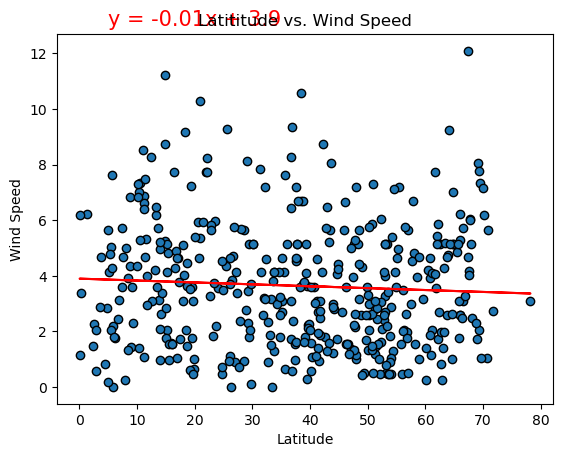

In [21]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 5, 13)


The r^2-value is: 0.027641616649389075


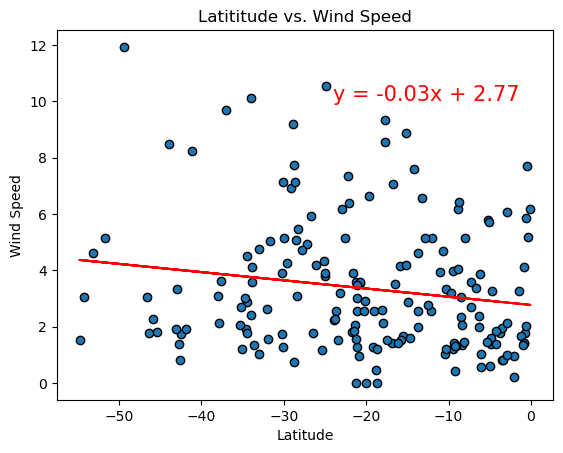

In [22]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -24, 10)


Analysis of the Linear Relationship Between Latitude and Wind Speed:

An initial visual inspection of the scatter plots for wind speeds relative to latitude in both the Northern and Southern Hemispheres suggests a slight trend, with wind speeds appearing to increase as one moves further from the equator.

The regression lines in both hemispheres seem to reinforce this observation, suggesting a potential relationship between latitude and wind speed.

However, the R² values for these datasets—around 0.0001 for the Northern Hemisphere and 0.095 for the Southern Hemisphere—indicate that the correlation is negligible. The low R² values suggest that latitude explains an extremely small fraction of the variation in wind speeds, undermining the existence of a significant linear relationship.

It is important to note that the relatively low R² value of 0.095 in the Southern Hemisphere might be misleading, as this value could be influenced by the geographic structure of the Southern Hemisphere.

Due to the unique configuration of landmasses and oceans in the Southern Hemisphere, cities are more likely to be located near coastlines or on island nations. This geographic feature introduces a confounding factor, as proximity to large bodies of water could influence local wind patterns, leading to a spurious correlation with latitude.

In summary, while there appears to be some visual trend, the data does not support a meaningful, actionable correlation between wind speed and latitude, especially when considering the R² values and the structural limitations of the dataset.

